In [26]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style
import unicodedata
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math

In [27]:
def generate_league_dicipline_data(x):
    url = x
    page = urlopen(url).read()
    soup = BeautifulSoup(page)
    count = 0 
    table = soup.find("tbody")

    rows = table.find_all("tr")
    data_stat_values = []

    for row in rows:
        data_stat_values.extend([td["data-stat"] for td in row.find_all("td")])

    features_wanted = list(set(data_stat_values)) + ["team"]


    pre_df = dict()
    rows = table.find_all('tr')
    for row in rows:
        for f in features_wanted:
            if (row.find('th', {"scope":"row"}) != None) & (row.find("td",{"data-stat": f}) != None):
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f]=[text]
                
    df = pd.DataFrame.from_dict(pre_df)
    # df["games"] = pd.to_numeric(df["games"])
    # df["xg_diff_per90"] = pd.to_numeric(df["xg_diff_per90"])
    # df["minutes_played"] = df["games"] *90
    return(df)

In [28]:
generate_league_dicipline_data('https://fbref.com/en/comps/9/misc/Premier-League-Stats')

,offsides,cards_yellow_red,pens_won,interceptions,cards_red,players_used,fouls,ball_recoveries,own_goals,tackles_won,aerials_won,aerials_lost,cards_yellow,fouled,minutes_90s,aerials_won_pct,pens_conceded,crosses
0,21,1,5,88,1,23,108,518,0,101,124,131,18,119,11.0,48.6,1,204
1,9,0,3,71,0,23,123,506,2,96,86,102,26,133,11.0,45.7,0,210
2,16,0,0,95,1,25,144,569,1,104,109,165,18,120,11.0,39.8,3,168
3,17,0,2,91,0,25,120,571,0,115,193,176,28,125,11.0,52.3,1,184
4,28,0,1,93,0,25,128,528,1,107,103,90,27,148,11.0,53.4,2,162
5,25,1,0,83,3,24,119,540,1,92,139,170,24,115,11.0,45.0,2,160
6,34,0,3,82,1,23,128,590,0,106,139,99,35,126,11.0,58.4,1,206
7,10,0,0,92,0,21,129,562,1,118,147,145,21,123,11.0,50.3,2,162
8,20,1,0,97,1,23,128,611,2,133,200,167,21,100,11.0,54.5,2,210
9,19,2,0,101,2,23,111,572,1,111,135,133,30,120,11.0,50.4,3,191


In [29]:
# Find all the <tr> elements within the <tbody> element
data_rows = soup.find("tbody").find_all("tr")

# Create an empty list to store the extracted data
data_list = []

# Iterate through each <tr> element to extract data
for row in data_rows:
    # Extract the team name
    team_name = row.find("a").text.strip()

    # Extract all data-stat items
    data_stat_items = [td.get("data-stat") for td in row.find_all("td")]

    # Create a dictionary to store the data for this team
    team_data = {"Team Name": team_name}
    for stat, value in zip(data_stat_items, row.find_all("td")):
        team_data[stat] = value.text.strip()

    # Append the team's data to the list
    data_list.append(team_data)

In [30]:
df = pd.DataFrame(data_list)

In [31]:
df

,Team Name,aerials_lost,aerials_won,aerials_won_pct,ball_recoveries,cards_red,cards_yellow,cards_yellow_red,crosses,fouled,fouls,interceptions,minutes_90s,offsides,own_goals,pens_conceded,pens_won,players_used,tackles_won
0,Arsenal,131,124,48.6,518,1,18,1,204,119,108,88,11.0,21,0,1,5,23,101
1,Aston Villa,102,86,45.7,506,0,26,0,210,133,123,71,11.0,9,2,0,3,23,96
2,Bournemouth,165,109,39.8,569,1,18,0,168,120,144,95,11.0,16,1,3,0,25,104
3,Brentford,176,193,52.3,571,0,28,0,184,125,120,91,11.0,17,0,1,2,25,115
4,Brighton,90,103,53.4,528,0,27,0,162,148,128,93,11.0,28,1,2,1,25,107
5,Burnley,170,139,45.0,540,3,24,1,160,115,119,83,11.0,25,1,2,0,24,92
6,Chelsea,99,139,58.4,590,1,35,0,206,126,128,82,11.0,34,0,1,3,23,106
7,Crystal Palace,145,147,50.3,562,0,21,0,162,123,129,92,11.0,10,1,2,0,21,118
8,Everton,167,200,54.5,611,1,21,1,210,100,128,97,11.0,20,2,2,0,23,133
9,Fulham,133,135,50.4,572,2,30,2,191,120,111,101,11.0,19,1,3,0,23,111


In [24]:
df = df.rename(columns={'Team Name': 'team'})
fm_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

data = df.merge(fm_ids, on='team', how='left')

data


,team,aerials_lost,aerials_won,aerials_won_pct,ball_recoveries,cards_red,cards_yellow,cards_yellow_red,crosses,fouled,...,interceptions,minutes_90s,offsides,own_goals,pens_conceded,pens_won,players_used,tackles_won,total_cards,team_id
0,Arsenal,131,124,48.6,518,1,18,1,204,119,...,88,11.0,21,0,1,5,23,101,20,9825
1,Aston Villa,102,86,45.7,506,0,26,0,210,133,...,71,11.0,9,2,0,3,23,96,26,10252
2,Bournemouth,165,109,39.8,569,1,18,0,168,120,...,95,11.0,16,1,3,0,25,104,19,8678
3,Brentford,176,193,52.3,571,0,28,0,184,125,...,91,11.0,17,0,1,2,25,115,28,9937
4,Brighton,90,103,53.4,528,0,27,0,162,148,...,93,11.0,28,1,2,1,25,107,27,10204
5,Burnley,170,139,45.0,540,3,24,1,160,115,...,83,11.0,25,1,2,0,24,92,28,8191
6,Chelsea,99,139,58.4,590,1,35,0,206,126,...,82,11.0,34,0,1,3,23,106,36,8455
7,Crystal Palace,145,147,50.3,562,0,21,0,162,123,...,92,11.0,10,1,2,0,21,118,21,9826
8,Everton,167,200,54.5,611,1,21,1,210,100,...,97,11.0,20,2,2,0,23,133,23,8668
9,Fulham,133,135,50.4,572,2,30,2,191,120,...,101,11.0,19,1,3,0,23,111,34,9879


In [32]:
clubs = list(data.team_id.unique())

In [23]:
data['fouls'] = pd.to_numeric(data['fouls'])
data['cards_yellow'] = pd.to_numeric(data['cards_yellow'])
data['cards_red'] = pd.to_numeric(data['cards_red'])
data['cards_yellow_red'] = pd.to_numeric(data['cards_yellow_red'])

data['total_cards'] = data['cards_yellow'] + data['cards_red'] + data['cards_yellow_red']


In [18]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

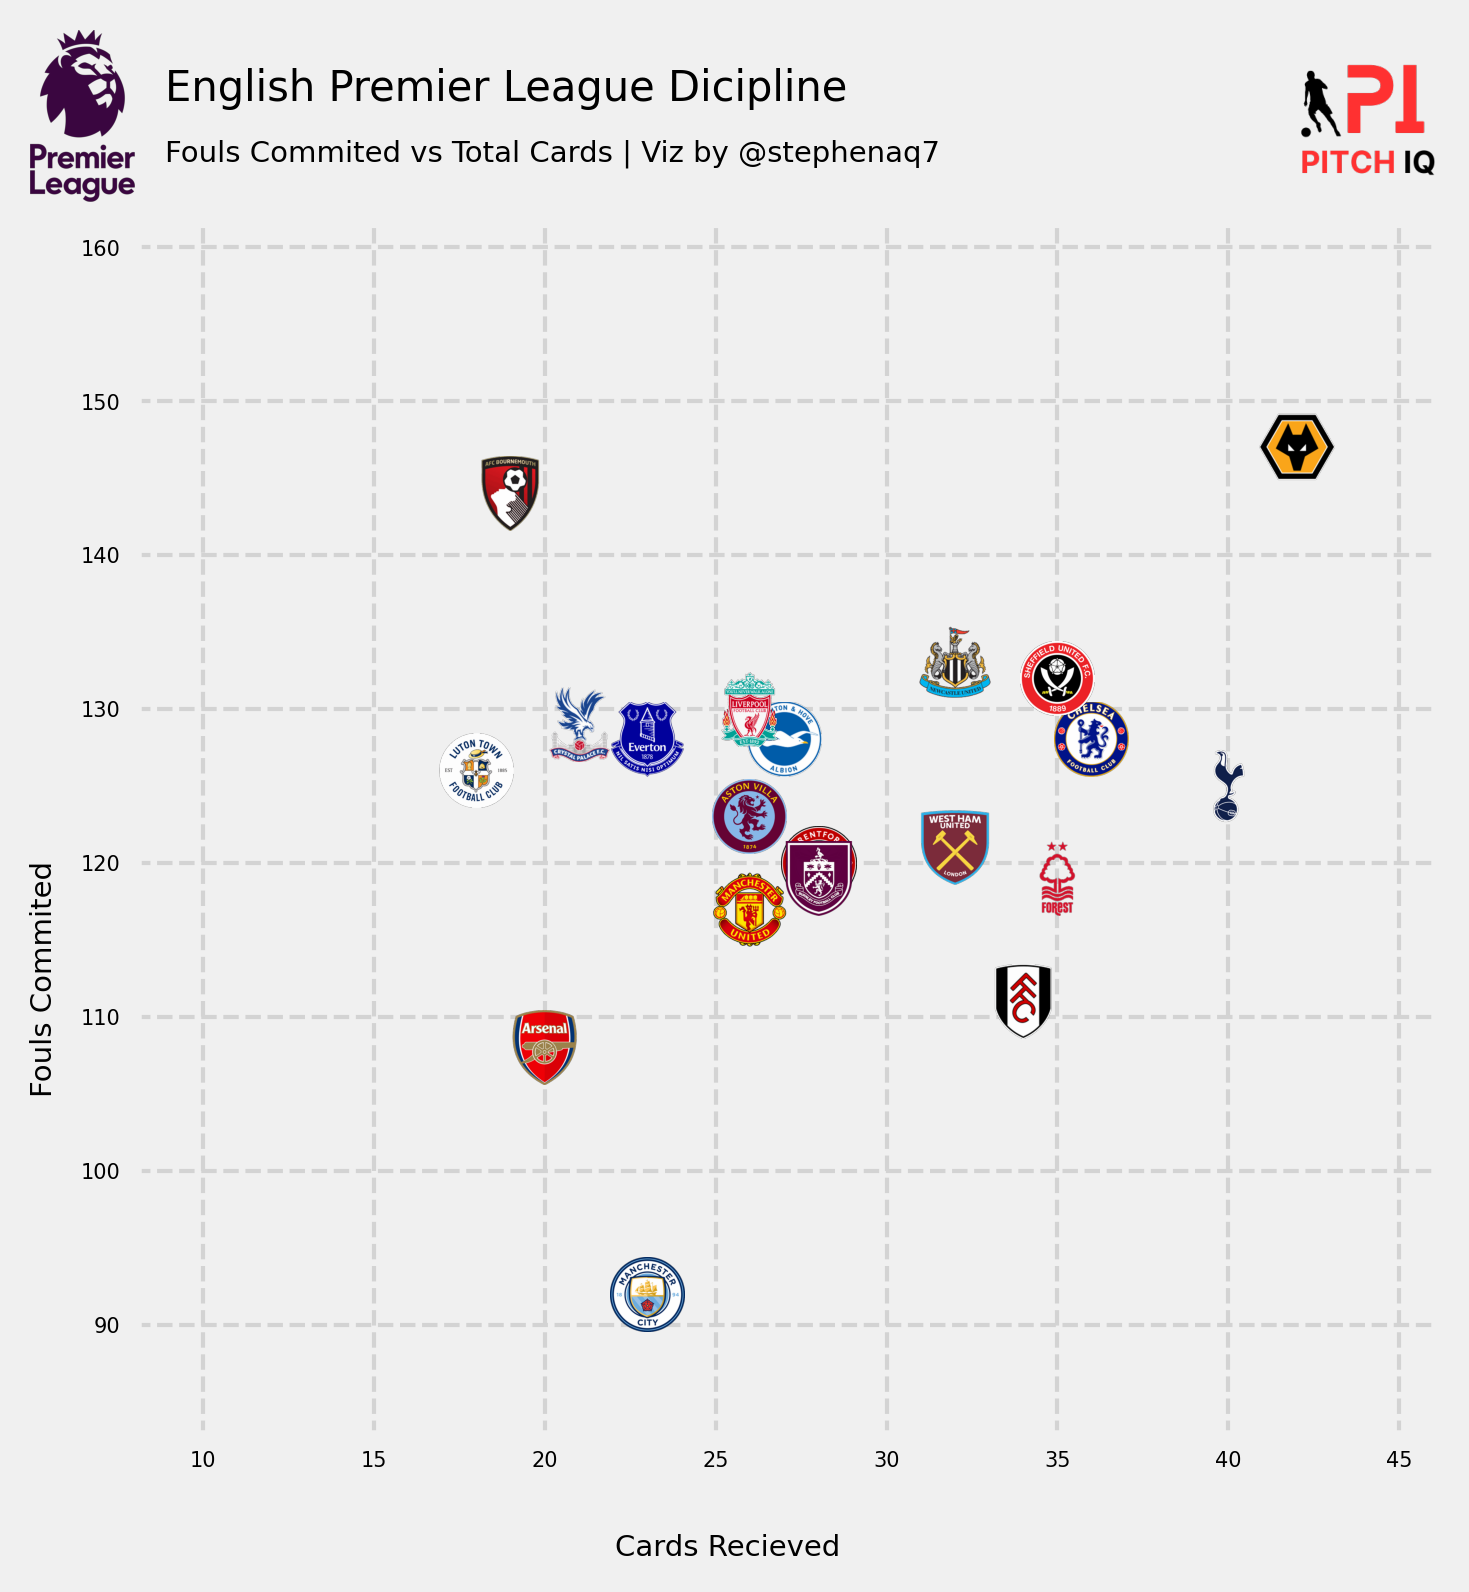

In [50]:
from PIL import Image
import matplotlib.image as image

style.use('fivethirtyeight')
x_loc = data['total_cards']
y_loc = data['fouls']

bgcol = '#fafafa'

fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()


ax.set_xlim(8, x_loc.max() * 1.1)
ax.set_ylim(y_loc.min()*0.9,y_loc.max()*1.1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

counter = 0
for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)

    counter += 1

# Change ticks
# Change ticks and tick positions
ax.tick_params(axis='both', which='major', labelsize=5, direction='inout')
ax.get_xaxis().tick_bottom()  # Move x-axis ticks to the bottom
ax.get_yaxis().tick_left()    # Move y-axis ticks to the left

plt.grid(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='both')  # Display grid lines for both axes




# ax.spines['left'].set_position('center')
# ax.spines['left'].set_color('black')
# ax.spines['bottom'].set_position('center')
# ax.spines['bottom'].set_color('black')
# # Eliminate upper and right axes
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(0.2)

# # Show ticks in the left and lower axes only
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')




## Title & comment
fig.text(.1,.92,'Fouls Commited vs Total Cards | Viz by @stephenaq7',size=7, font='Karla')
fig.text(.1,.96,'English Premier League Dicipline',size=10, font='Karla')

# ## Avg line explanation
fig.text(0.01,0.3,'Fouls Commited', size=7, color='k',rotation=90)
fig.text(.4,-0.01,'Cards Recieved', size=7, color='k')


ax2 = fig.add_axes([0.01, 0.075, 0.07, 1.75])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.1, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


## Save plot
plt.savefig('Fouls vs Total Cards.png', dpi=1200)

In [53]:
data["aerials_won"] = pd.to_numeric(df["aerials_won"])
data["ball_recoveries"] = pd.to_numeric(df["ball_recoveries"])
data["interceptions"] = pd.to_numeric(df["interceptions"])
data["tackles_won"] = pd.to_numeric(df["tackles_won"])
data['combined_combat_stats'] = data['aerials_won'] + data['ball_recoveries'] + data['interceptions'] + data['tackles_won']

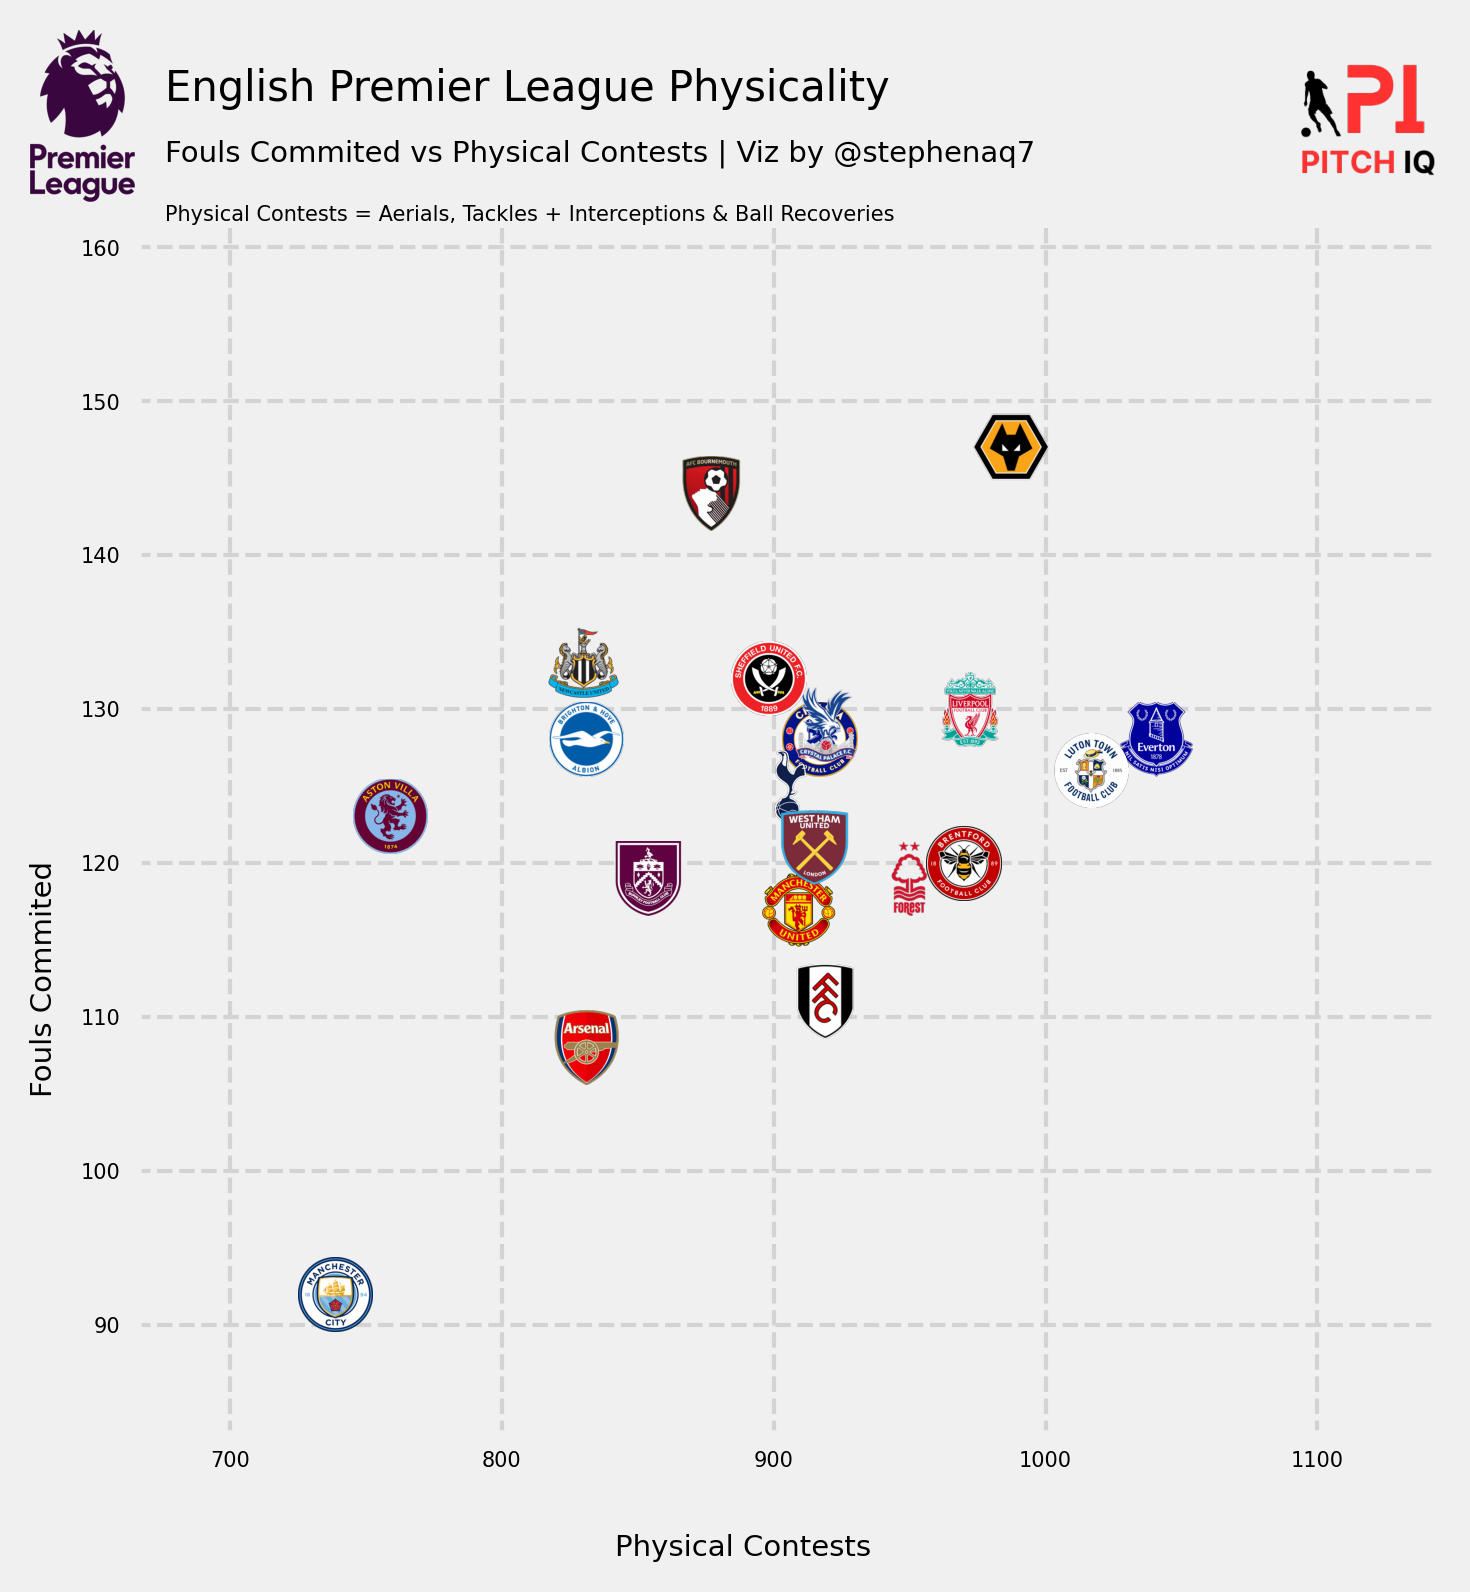

In [57]:
from PIL import Image
import matplotlib.image as image

style.use('fivethirtyeight')
x_loc = data['combined_combat_stats']
y_loc = data['fouls']

bgcol = '#fafafa'

fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()


ax.set_xlim(x_loc.min()*0.9, x_loc.max() * 1.1)
ax.set_ylim(y_loc.min()*0.9,y_loc.max()*1.1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

counter = 0
for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)

    counter += 1

# Change ticks
# Change ticks and tick positions
ax.tick_params(axis='both', which='major', labelsize=5, direction='inout')
ax.get_xaxis().tick_bottom()  # Move x-axis ticks to the bottom
ax.get_yaxis().tick_left()    # Move y-axis ticks to the left

plt.grid(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='both')  # Display grid lines for both axes




# ax.spines['left'].set_position('center')
# ax.spines['left'].set_color('black')
# ax.spines['bottom'].set_position('center')
# ax.spines['bottom'].set_color('black')
# # Eliminate upper and right axes
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(0.2)

# # Show ticks in the left and lower axes only
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')




## Title & comment
fig.text(.1,.88,'Physical Contests = Aerials, Tackles + Interceptions & Ball Recoveries',size=5, font='Karla')
fig.text(.1,.92,'Fouls Commited vs Physical Contests | Viz by @stephenaq7',size=7, font='Karla')
fig.text(.1,.96,'English Premier League Physicality',size=10, font='Karla')

# ## Avg line explanation
fig.text(0.01,0.3,'Fouls Commited', size=7, color='k',rotation=90)
fig.text(.4,-0.01,'Physical Contests', size=7, color='k')


ax2 = fig.add_axes([0.01, 0.075, 0.07, 1.75])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.1, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


## Save plot
plt.savefig('Fouls vs Total Cards.png', dpi=1200)

In [72]:
url = 'https://fbref.com/en/comps/9/misc/Premier-League-Stats'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
stats = df[-1]

In [74]:
Player_stats = stats[['Player', 'Fls','CrdY', 'CrdR', '2CrdY', '90s']]

In [75]:
Player_stats.rename(columns={'Fls': 'Fouls', 'CrdY': 'cards_yellow', 'CrdR': 'cards_red', '2CrdY': 'cards_yellow_red', '90s': '90s'}, inplace=True)

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [77]:
Player_stats = Player_stats[Player_stats['Player'] != 'Player']
Player_stats

,Player,Fouls,cards_yellow,cards_red,cards_yellow_red,90s
0,Max Aarons,9,1,0,0,9.8
1,Bénie Adama Traore,9,0,0,0,3.6
2,Tosin Adarabioyo,0,0,0,0,0.0
3,Elijah Adebayo,9,0,0,0,4.3
4,Simon Adingra,8,0,0,0,6.4
5,Nayef Aguerd,7,2,1,1,9.7
6,Naouirou Ahamada,2,0,0,0,0.9
7,Anel Ahmedhodžić,11,3,0,0,8.0
8,Ola Aina,6,3,0,0,6.1
9,Rayan Aït Nouri,10,3,0,0,8.7


In [78]:
Player_stats[Player_stats.columns.difference(['Player'])] = Player_stats[Player_stats.columns.difference(['Player'])].apply(pd.to_numeric, errors='coerce')


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [80]:
Player_stats['total_cards'] = Player_stats['cards_yellow'] + Player_stats['cards_red'] + Player_stats['cards_yellow_red']

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
Player_stats['total_cards_p90'] = Player_stats['total_cards']/Player_stats['90s']
Player_stats['Fouls_p90'] = Player_stats['Fouls']/Player_stats['90s']
Player_stats['total_cards_per_foul'] = Player_stats['total_cards']/Player_stats['Fouls']

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [87]:
Player_stats = Player_stats[Player_stats['total_cards'] >= 2]

In [85]:
Player_stats = Player_stats.dropna(subset=['total_cards_p90'])

In [97]:
Player_stats = Player_stats[Player_stats['90s'] >= 4.5]
Player_stats['total_cards_per_foul'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the 'total_cards_per_foul' column
Player_stats.dropna(subset=['total_cards_per_foul'], inplace=True)

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [98]:
players = ['Yves Bissouma',
'Anthony Gordon',
'Nicolas Jackson',
'Emerson Palmieri',
'Edson Álvarez',
'Josh Cullen',
'Bruno Guimarães',	
'Aaron Hickey',
'Alexis Mac Allister',
'Lucas Paquetá',
'Destiny Udogie',
'Ashley Young',
'Jordan Ayew',
'Jarrad Branthwaite',
'Craig Dawson']

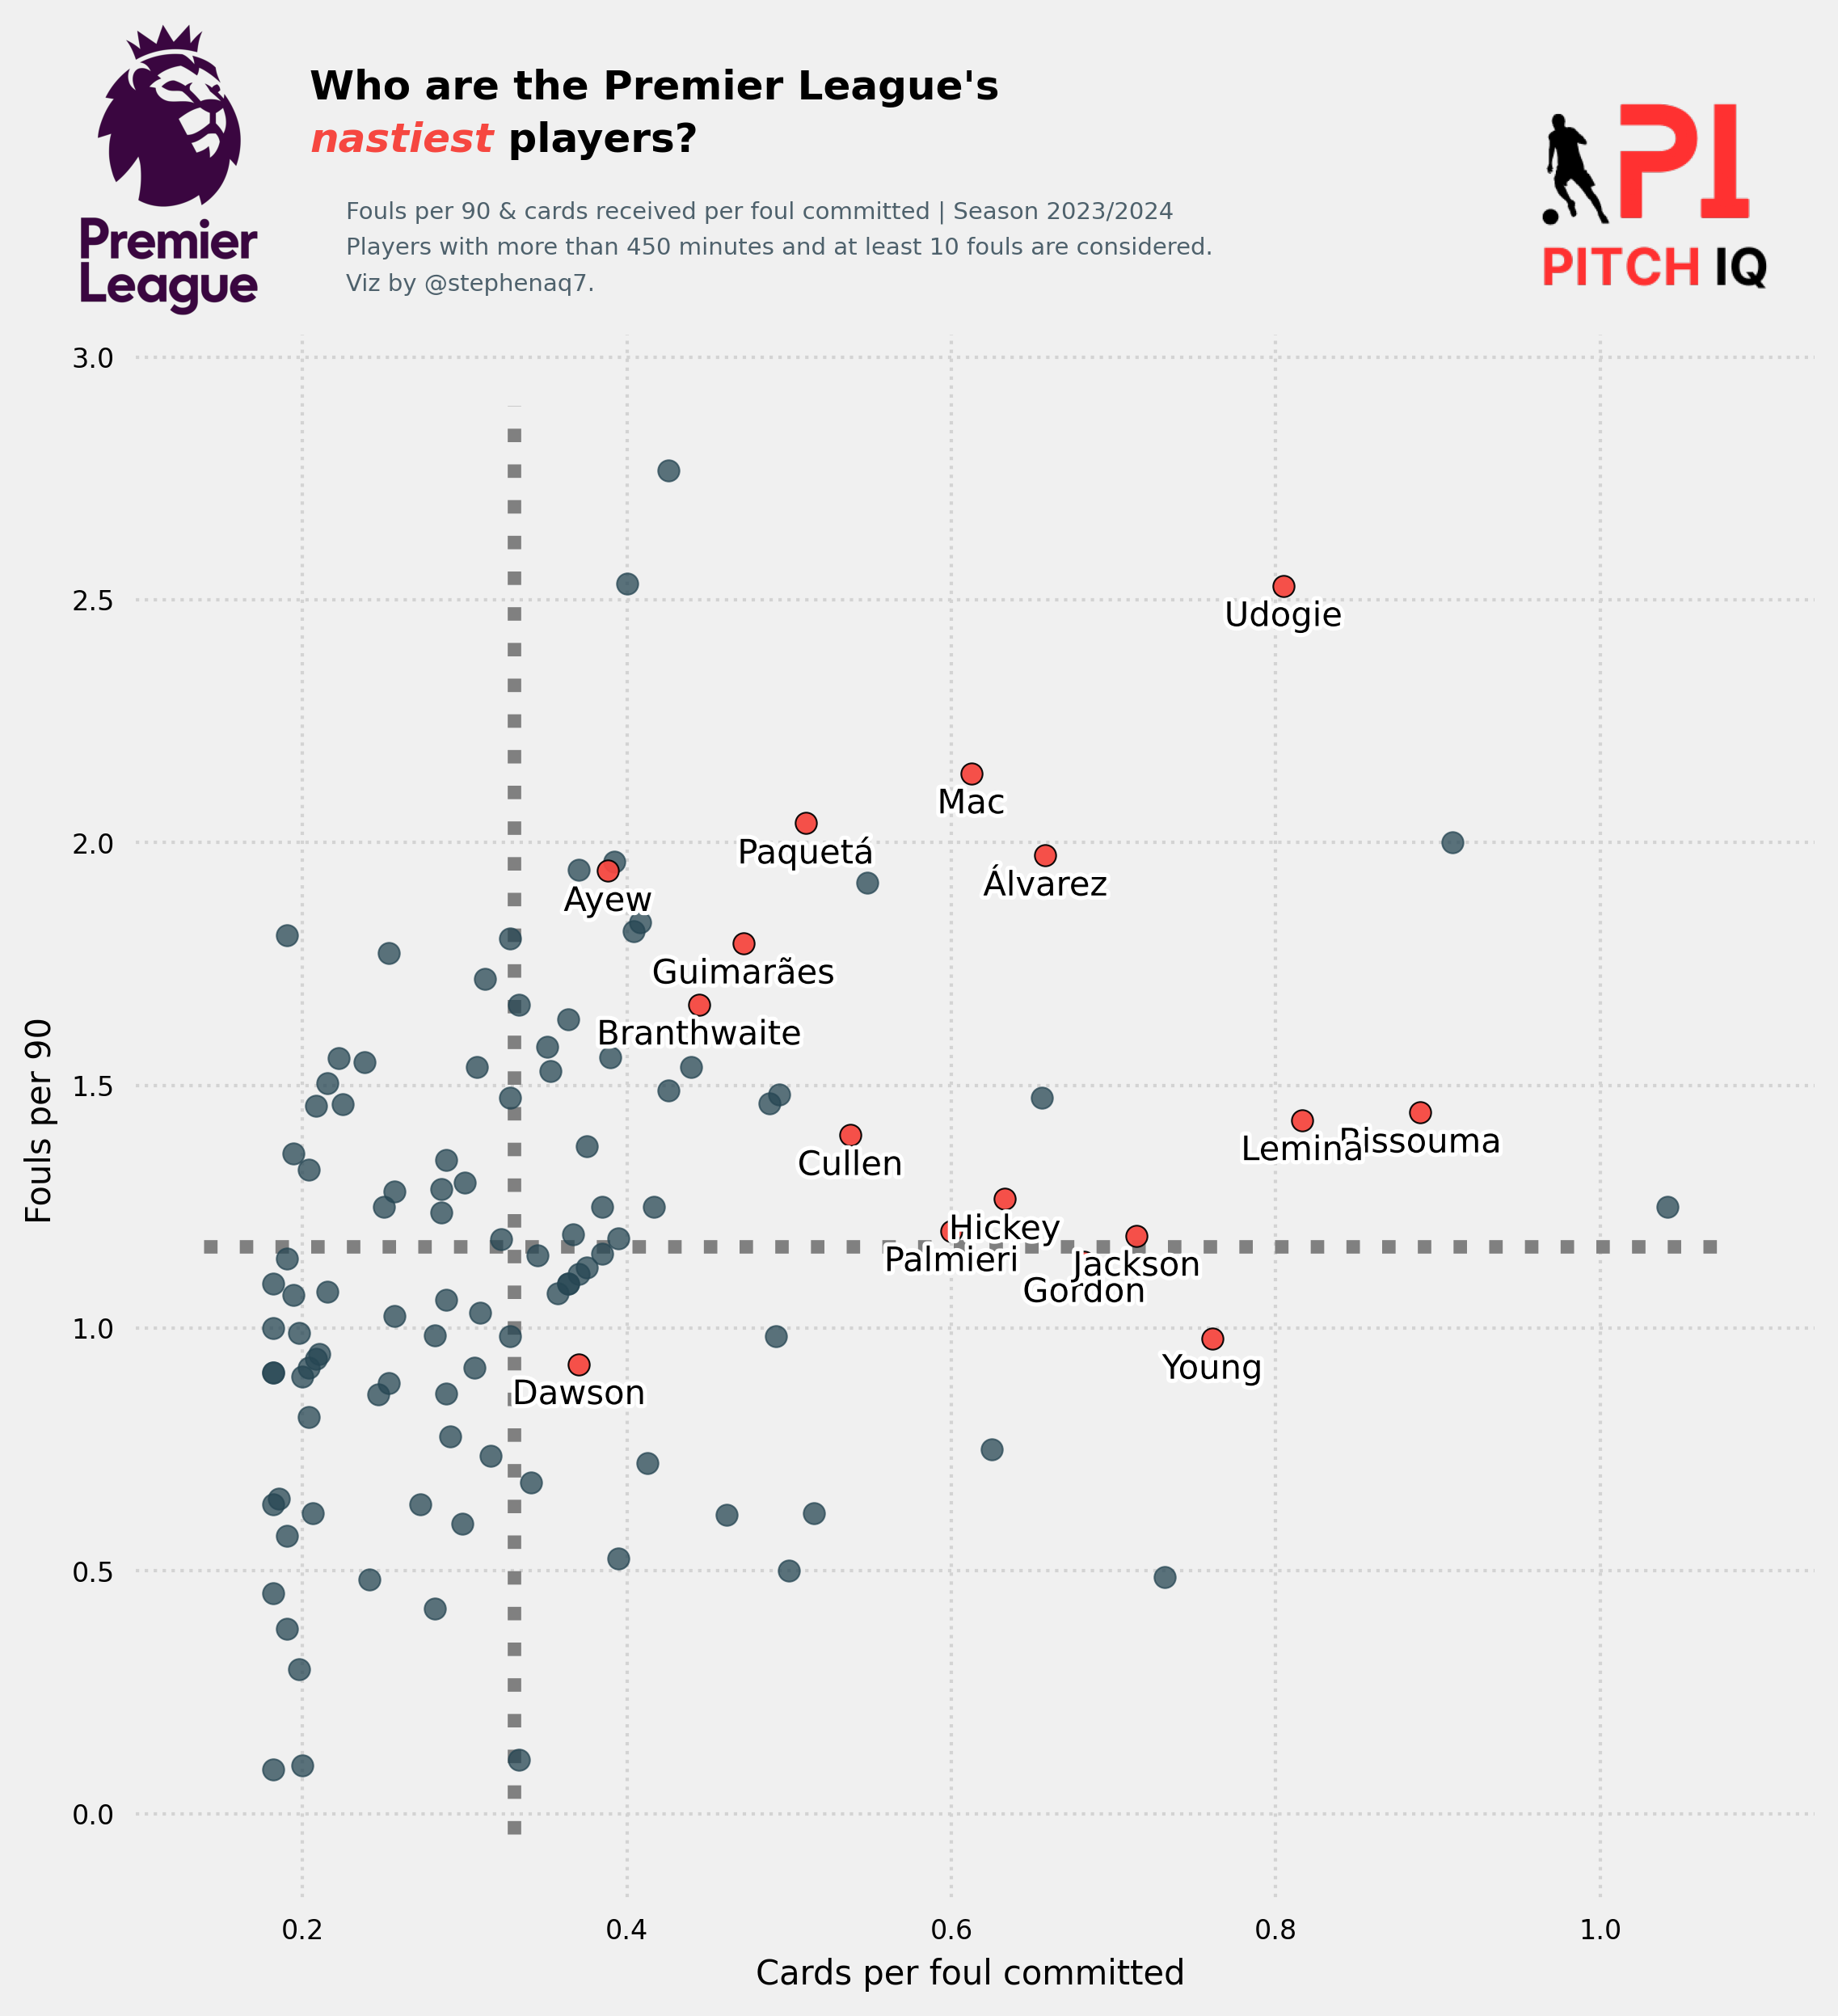

In [132]:
df_main = Player_stats[~Player_stats["Player"].isin(players)].reset_index(drop = True)
df_highlight = Player_stats[Player_stats["Player"].isin(players)].reset_index(drop = True)

# %%

# -- Plot the chart

fig = plt.figure(figsize = (8,8), dpi = 300)
ax = plt.subplot()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    df_main['total_cards_p90'],
    df_main['Fouls_p90'],  
    s = 40, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
)

ax.scatter(
    df_highlight["total_cards_p90"], 
    df_highlight["Fouls_p90"], 
    s = 40, 
    alpha = 0.95, 
    color = "#F64740",
    zorder = 3,
    ec = "#000000",
)

ax.plot(
    [Player_stats['total_cards_p90'].median(), Player_stats['total_cards_p90'].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [Player_stats['Fouls_p90'].median(), Player_stats['Fouls_p90'].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.grid(True, ls = ":", color = "lightgray")

for index, name in enumerate(df_highlight["Player"]):
    X = df_highlight["total_cards_p90"].iloc[index]
    Y = df_highlight["Fouls_p90"].iloc[index]
    if name in [" Joelinton", " Richarlison", "Alexandre Lacazette"]:
        y_pos = 9
    else:
        y_pos = -9
    if name in ["Scott McTominay"]:
        x_pos = 20
    else:
        x_pos = 0
    text_ = ax.annotate(
        xy = (X, Y),
        text = name.split(" ")[1],
        ha = "center",
        va = "center",
        xytext = (x_pos, y_pos),
        textcoords = "offset points",
        fontsize=10, 
    )

    text_.set_path_effects(
                [path_effects.Stroke(linewidth=2.5, foreground="white"), 
                path_effects.Normal()]
            )


ax.set_xlabel("Cards per foul committed",fontsize=10)
ax.set_ylabel("Fouls per 90",fontsize=10)

# # ---- The Naught Boys Image
league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

ax.tick_params(axis='both', which='major', labelsize=8)

fig_text(
    x = 0.53, y = 0.97, 
    s = "Who are the Premier League's\n<nastiest> players?",
    highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 12, color = "black", font = "Karla", weight = "bold"
)

fig_text(
	x = 0.64, y = .90, 
    s = "Fouls per 90 & cards received per foul committed | Season 2023/2024\nPlayers with more than 450 minutes and at least 10 fouls are considered.\nViz by @stephenaq7.",
	va = "bottom", ha = "right",
	fontsize = 7, color = "#4E616C", font = "Karla"
)

### Add Stats by Steve logo
ax3 = fig.add_axes([0.80, 0.08, 0.13, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)




In [133]:
url = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
# df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
fixtures_23_24 = df[0]

In [134]:
url = 'https://fbref.com/en/comps/9/2022-2023/schedule/2022-2023-Premier-League-Scores-and-Fixtures'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
# df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
fixtures_22_23 = df[0]

In [135]:
url = 'https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
# df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
fixtures_21_22 = df[0]

In [136]:
multi_season = pd.concat([fixtures_23_24, fixtures_22_23, fixtures_21_22 ])

In [137]:

multi_season.dropna(subset=['Referee'], inplace=True)
multi_season['match_id'] = range(1, len(multi_season) + 1)
multi_season_away = multi_season[['Away','xG', 'Score', 'xG.1','match_id', 'Date','Referee']]
multi_season_away.rename(columns={'Away': 'team'}, inplace=True)
multi_season_away.rename(columns={'xG.1': 'xG_for'}, inplace=True)
multi_season_away.rename(columns={'xG': 'xG_ag'}, inplace=True)
multi_season_away['venue'] = 'A'
multi_season_away[['score_ag','score_for']] = multi_season['Score'].str.split('–', expand=True)
multi_season_home = multi_season[['Home','xG', 'Score', 'xG.1','match_id', 'Date','Referee']]
multi_season_home.rename(columns={'Home': 'team'}, inplace=True)
multi_season_home.rename(columns={'xG.1': 'xG_ag'}, inplace=True)
multi_season_home.rename(columns={'xG': 'xG_for'}, inplace=True)
multi_season_home['venue'] = 'H'
multi_season_home[['score_for','score_ag']] = multi_season['Score'].str.split('–', expand=True)

columns = multi_season_away.columns

multi_season_home = multi_season_home[columns]



/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [138]:
multi_season_expanded = pd.concat([multi_season_away, multi_season_home])

multi_melted_df = multi_season_expanded.melt(id_vars=['match_id','Date', 'venue', 'team','Referee'], value_vars=['score_for', 'score_ag', 'xG_for', 'xG_ag',], 
                    var_name='variable', value_name='value')

Final_df = multi_melted_df.merge(fm_ids, on='team', how='left')

Final_df.rename(columns={'team': 'team_name'}, inplace=True)

Final_df.rename(columns={'Date': 'date'}, inplace=True)


ref_df = Final_df


In [139]:
ref_df

,match_id,date,venue,team_name,Referee,variable,value,team_id
0,1,2023-08-11,A,Manchester City,Craig Pawson,score_for,3,8456.0
1,2,2023-08-12,A,Nott'ham Forest,Michael Oliver,score_for,1,10203.0
2,3,2023-08-12,A,Fulham,Stuart Attwell,score_for,1,9879.0
3,4,2023-08-12,A,Crystal Palace,John Brooks,score_for,1,9826.0
4,5,2023-08-12,A,Luton Town,David Coote,score_for,1,8346.0
5,6,2023-08-12,A,West Ham,Peter Bankes,score_for,1,8654.0
6,7,2023-08-12,A,Aston Villa,Andy Madley,score_for,1,10252.0
7,8,2023-08-13,A,Tottenham,Robert Jones,score_for,2,8586.0
8,9,2023-08-13,A,Liverpool,Anthony Taylor,score_for,1,8650.0
9,10,2023-08-14,A,Wolves,Simon Hooper,score_for,0,8602.0


In [145]:
df = ref_df[['date', 'venue', 'team_name', 'Referee', 'variable', 'value']]

# Pivot the DataFrame to have goals_for and goals_against as separate columns
df_pivot = pd.pivot_table(df,
            index=[  'Referee','team_name'],columns='variable', values='value', aggfunc= 'first'
        ).reset_index().rename_axis(None, 1)



# # Reset the index to make 'date', 'venue', and 'Referee' columns
# df_pivot = df_pivot.reset_index()

# # Calculate the total goals per game for each referee
# df_pivot['total_goals'] = df_pivot['score_for'] + df_pivot['score_ag']

# # Now, you have a DataFrame that shows goals for and against per game for each referee, split by venue
df_pivot

,Referee,team_name,score_ag,score_for,xG_ag,xG_for
0,Andre Marriner,Arsenal,1,4,1.6,3.5
1,Andre Marriner,Bournemouth,2,0,1.6,0.6
2,Andre Marriner,Brentford,2,2,1.5,1.5
3,Andre Marriner,Brighton,1,4,1.3,2.2
4,Andre Marriner,Burnley,1,1,1.8,0.7
5,Andre Marriner,Chelsea,1,3,2.4,1.6
6,Andre Marriner,Crystal Palace,0,2,0.6,1.6
7,Andre Marriner,Everton,1,2,1.7,2
8,Andre Marriner,Leeds United,2,1,2.1,1.4
9,Andre Marriner,Leicester City,0,0,2.1,0.1
